In [2]:
library(sf)
library(fs)
library(tidyverse)

Linking to GEOS 3.9.1, GDAL 3.3.2, PROJ 8.0.1

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
options(repr.plot.width = 9, repr.plot.height = 5, repr.plot.res = 300)

In [46]:
kolyma_agb = st_read('/projects/my-private-bucket/KolymaRegion_all_s3tp_agb_age.gpkg')

Reading layer `KolymaRegion_all_s3tp_agb_age' from data source 
  `/projects/my-private-bucket/KolymaRegion_all_s3tp_agb_age.gpkg' 
  using driver `GPKG'
Simple feature collection with 401 features and 16 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 129.5668 ymin: 61.81941 xmax: 162.2142 ymax: 69.51365
Geodetic CRS:  WGS 84


In [50]:
kolyma_agb %>% as.data.frame()

site,lat,lon,canopy_cover,canopy_ste,stand_density,density_ste,larch_biomass,biomass_ste,year,area_sampled,project,plot,index1,value_agb2020,value_standage2020,geom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<POINT [°]>
1,68.76231,161.2361,15.5100000,1.0000000,0.0500,0.03,611.20000,431.5,2010,50-100,Alexander2012,NA,0,7.883204,0,POINT (161.2361 68.76231)
2,68.76919,161.2440,7.5200000,0.6000000,0.0000,0.00,0.00000,0.0,2010,50-100,Alexander2012,NA,1,19.861423,0,POINT (161.244 68.76919)
3,68.78801,161.4960,7.8600000,1.6000000,0.0200,0.02,0.30000,0.3,2010,50-100,Alexander2012,NA,2,11.972603,0,POINT (161.496 68.78801)
4,68.78220,161.4764,2.9100000,0.8700000,0.0100,0.01,0.00000,0.0,2010,50-100,Alexander2012,NA,3,10.625208,0,POINT (161.4764 68.7822)
5,68.74570,161.5340,0.7400000,0.3900000,0.0000,0.00,0.00000,0.0,2010,50-100,Alexander2012,NA,4,10.194928,0,POINT (161.534 68.7457)
6,68.76189,161.3874,30.0300000,10.4200000,0.8400,0.19,425.90000,142.6,2010,50-100,Alexander2012,NA,5,41.989246,0,POINT (161.3874 68.76189)
7,68.33555,161.0250,25.6200000,2.5800000,0.4600,0.14,816.10000,304.5,2010,50-100,Alexander2012,NA,6,24.812958,0,POINT (161.025 68.33555)
8,68.33569,161.0282,8.9400000,2.4300000,0.1300,0.03,2.10000,0.7,2010,50-100,Alexander2012,NA,7,18.474174,0,POINT (161.0282 68.33569)
9,68.51910,161.6036,66.3000000,2.4000000,4.0300,0.37,2143.90000,109.7,2010,50-100,Alexander2012,NA,8,38.000046,0,POINT (161.6036 68.5191)


In [5]:
kolyma_tcc = st_read('/projects/my-private-bucket/KolymaRegion_all_s3tp_tcc1984-2020.gpkg')
names(kolyma_tcc)[which(names(kolyma_tcc) == 'project')] <- 'group_name'

Reading layer `kolymaregion_s3tp_tcc1984-2020' from data source 
  `/projects/my-private-bucket/KolymaRegion_all_s3tp_tcc1984-2020.gpkg' 
  using driver `GPKG'
Simple feature collection with 401 features and 51 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 129.5668 ymin: 61.81941 xmax: 162.2142 ymax: 69.51365
Geodetic CRS:  WGS 84


In [6]:
names(kolyma_tcc)

[1] "site"          "lat"           "lon"           "canopy_cover" 
 [5] "canopy_ste"    "stand_density" "density_ste"   "larch_biomass"
 [9] "biomass_ste"   "year"          "area_sampled"  "group_name"   
[13] "plot"          "index1"        "tp_tcc1984"    "tp_tcc1985"   
[17] "tp_tcc1986"    "tp_tcc1987"    "tp_tcc1988"    "tp_tcc1989"   
[21] "tp_tcc1990"    "tp_tcc1991"    "tp_tcc1992"    "tp_tcc1993"   
[25] "tp_tcc1994"    "tp_tcc1995"    "tp_tcc1996"    "tp_tcc1997"   
[29] "tp_tcc1998"    "tp_tcc1999"    "tp_tcc2000"    "tp_tcc2001"   
[33] "tp_tcc2002"    "tp_tcc2003"    "tp_tcc2004"    "tp_tcc2005"   
[37] "tp_tcc2006"    "tp_tcc2007"    "tp_tcc2008"    "tp_tcc2009"   
[41] "tp_tcc2010"    "tp_tcc2011"    "tp_tcc2012"    "tp_tcc2013"   
[45] "tp_tcc2014"    "tp_tcc2015"    "tp_tcc2016"    "tp_tcc2017"   
[49] "tp_tcc2018"    "tp_tcc2019"    "tp_tcc2020"    "geom"

In [7]:
eurasia_tcc = st_read('/projects/my-private-bucket/eurasia_forest_structure_plots_smrytrees_s3tp_tcc1984-2020.gpkg')
names(eurasia_tcc)[which(names(eurasia_tcc) == 'tcc_perc')] <- 'canopy_cover'

Reading layer `eurasia_forest_structure_plots_smrytrees_s3tp_tcc1984-2020' from data source `/projects/my-private-bucket/eurasia_forest_structure_plots_smrytrees_s3tp_tcc1984-2020.gpkg' 
  using driver `GPKG'
replacing null geometries with empty geometries
Simple feature collection with 649 features and 68 fields (with 3 geometries empty)
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 85.78586 ymin: 42.0717 xmax: 138.5928 ymax: 72.409
Geodetic CRS:  WGS 84


In [8]:
names(eurasia_tcc)

[1] "site"                "group_name"          "year"               
 [4] "glas_campaign"       "glas_ndx"            "glas_shot"          
 [7] "lat"                 "lon"                 "rad_m"              
[10] "num_plots"           "plot_area_m2"        "canopy_closure_perc"
[13] "N_ht"                "Ht_min"              "Ht_mean"            
[16] "Ht_med"              "Ht_max"              "Ht_qmch"            
[19] "Ht_sd"               "Ht_se"               "N_dbh"              
[22] "DBH_min"             "DBH_mean"            "DBH_med"            
[25] "DBH_max"             "DBH_sd"              "DBH_se"             
[28] "canopy_area_m2_sum"  "N_dens_ha"           "canopy_cover"       
[31] "index1"              "tp_tcc1984"          "tp_tcc1985"         
[34] "tp_tcc1986"          "tp_tcc1987"          "tp_tcc1988"         
[37] "tp_tcc1989"          "tp_tcc1990"          "tp_tcc1991"         
[40] "tp_tcc1992"          "tp_tcc1993"          "tp_tcc1994"         
[43] "tp_tcc1995"          "tp_tcc1996"          "tp_tcc1997"         
[46] "tp_tcc1998"          "tp_tcc1999"          "tp_tcc2000"         
[49] "tp_tcc2001"          "tp_tcc2002"          "tp_tcc2003"         
[52] "tp_tcc2004"          "tp_tcc2005"          "tp_tcc2006"         
[55] "tp_tcc2007"          "tp_tcc2008"          "tp_tcc2009"         
[58] "tp_tcc2010"          "tp_tcc2011"          "tp_tcc2012"         
[61] "tp_tcc2013"          "tp_tcc2014"          "tp_tcc2015"         
[64] "tp_tcc2016"          "tp_tcc2017"          "tp_tcc2018"         
[67] "tp_tcc2019"          "tp_tcc2020"          "geom"

Warning message:
“Removed 172 rows containing missing values (geom_point).”


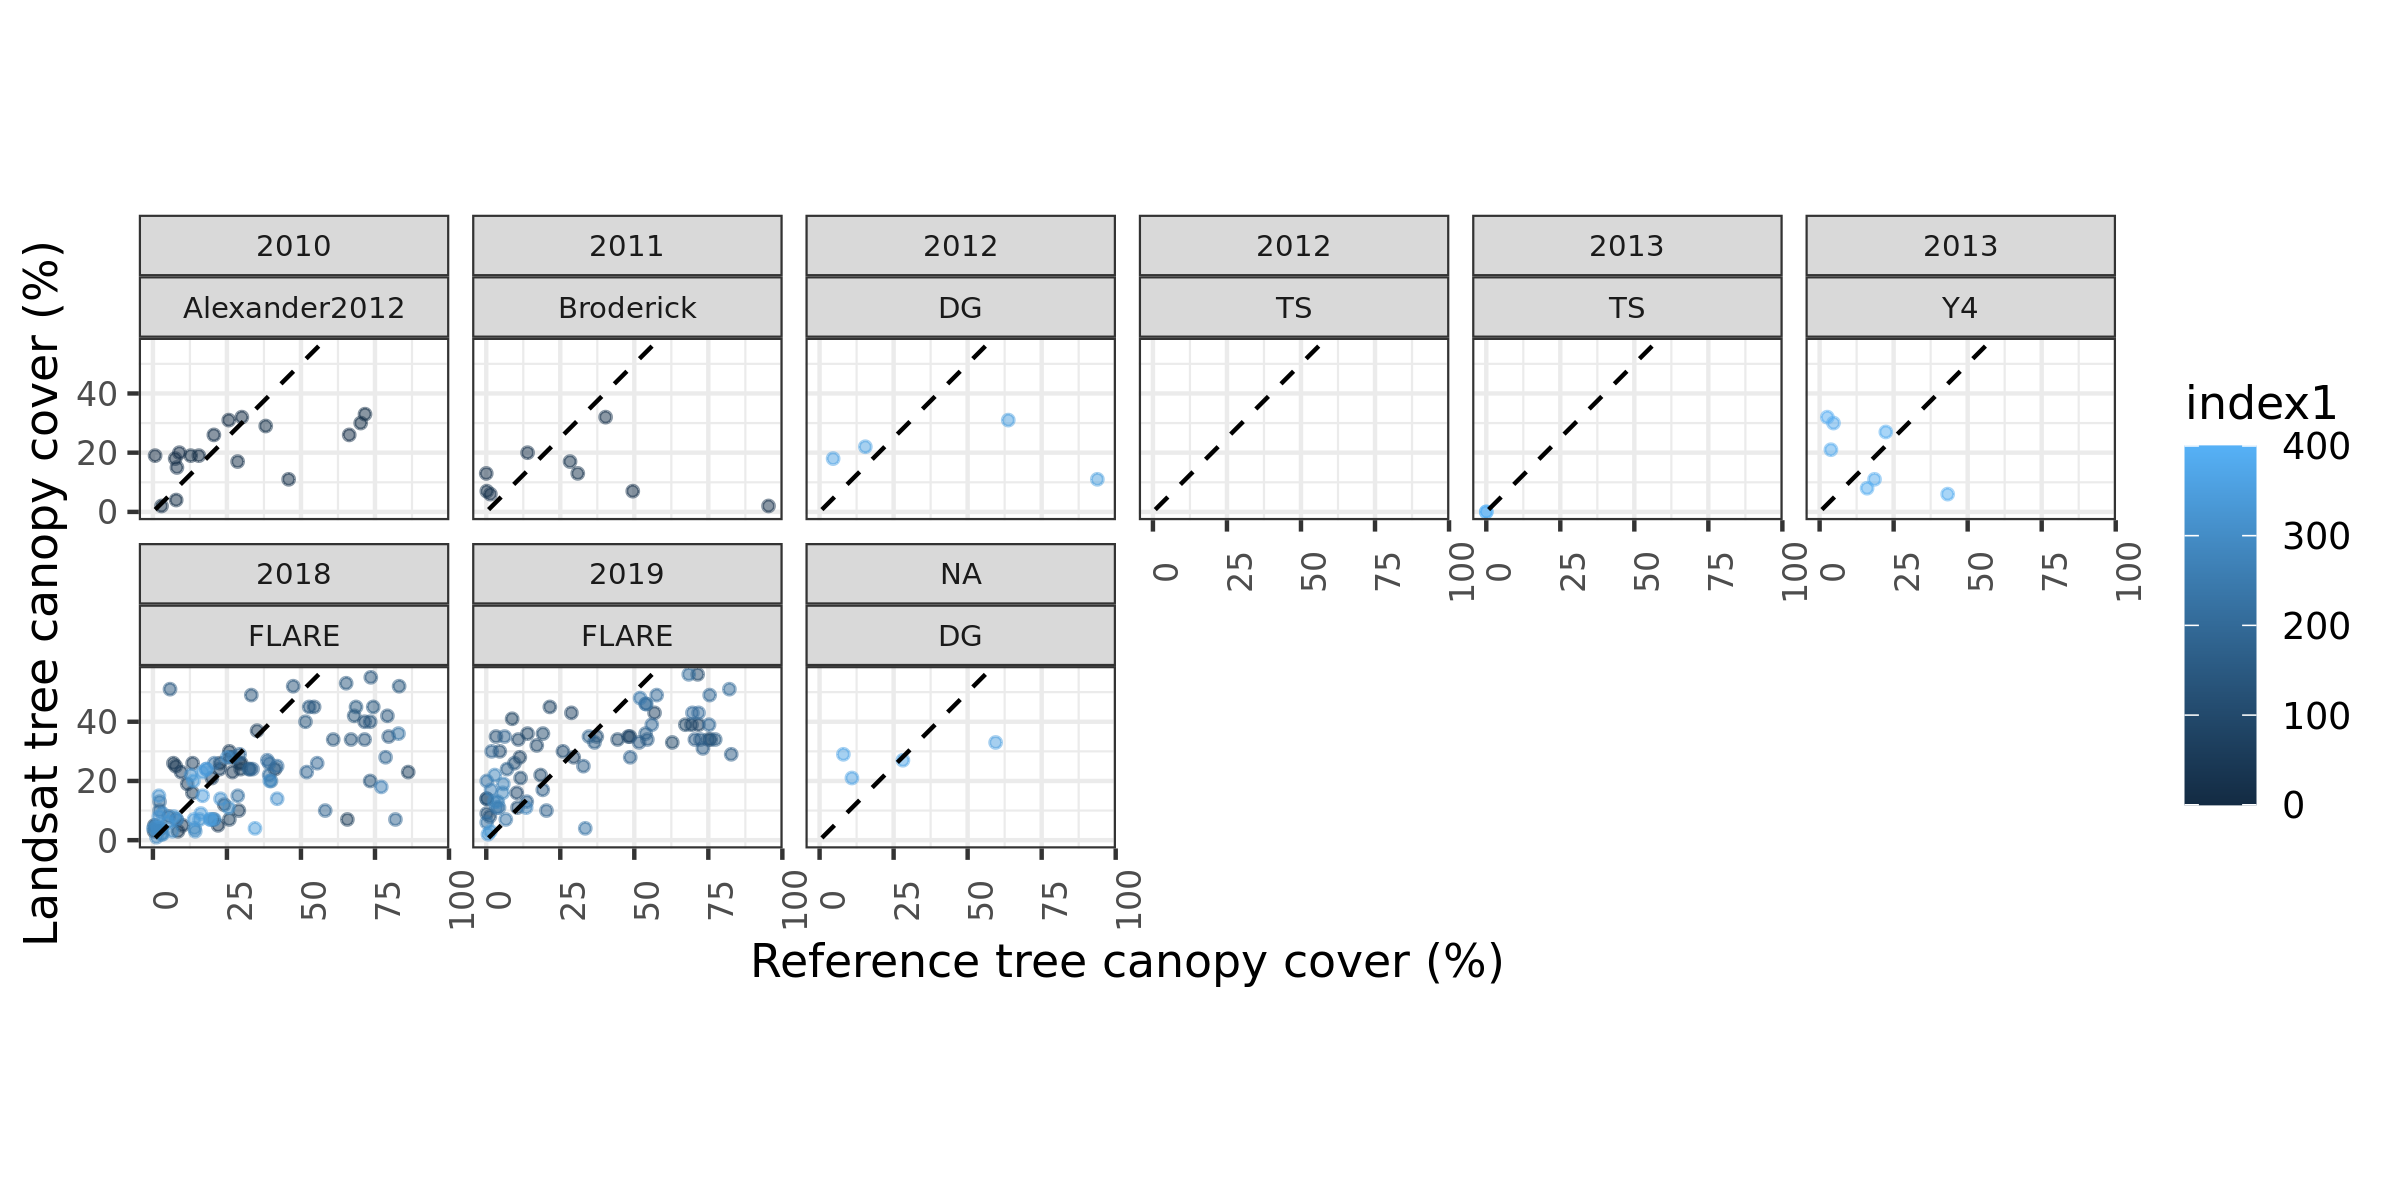

In [45]:
kolyma_tcc %>%
ggplot(aes(x=as.numeric(canopy_cover), y=tp_tcc2018)) + 
geom_point(aes(color=index1), size=1, alpha=0.5) + 
geom_abline(linetype='dashed') +
coord_equal() +
theme_bw() +
theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
labs(x='Reference tree canopy cover (%)', y = 'Landsat tree canopy cover (%)') +
facet_wrap(year~group_name, ncol=6)

In [10]:
dim(eurasia_tcc %>% drop_na(names(eurasia_tcc)[grep("tp_tcc199", names(eurasia_tcc))]) %>% 
as.data.frame())

[1] 104  69

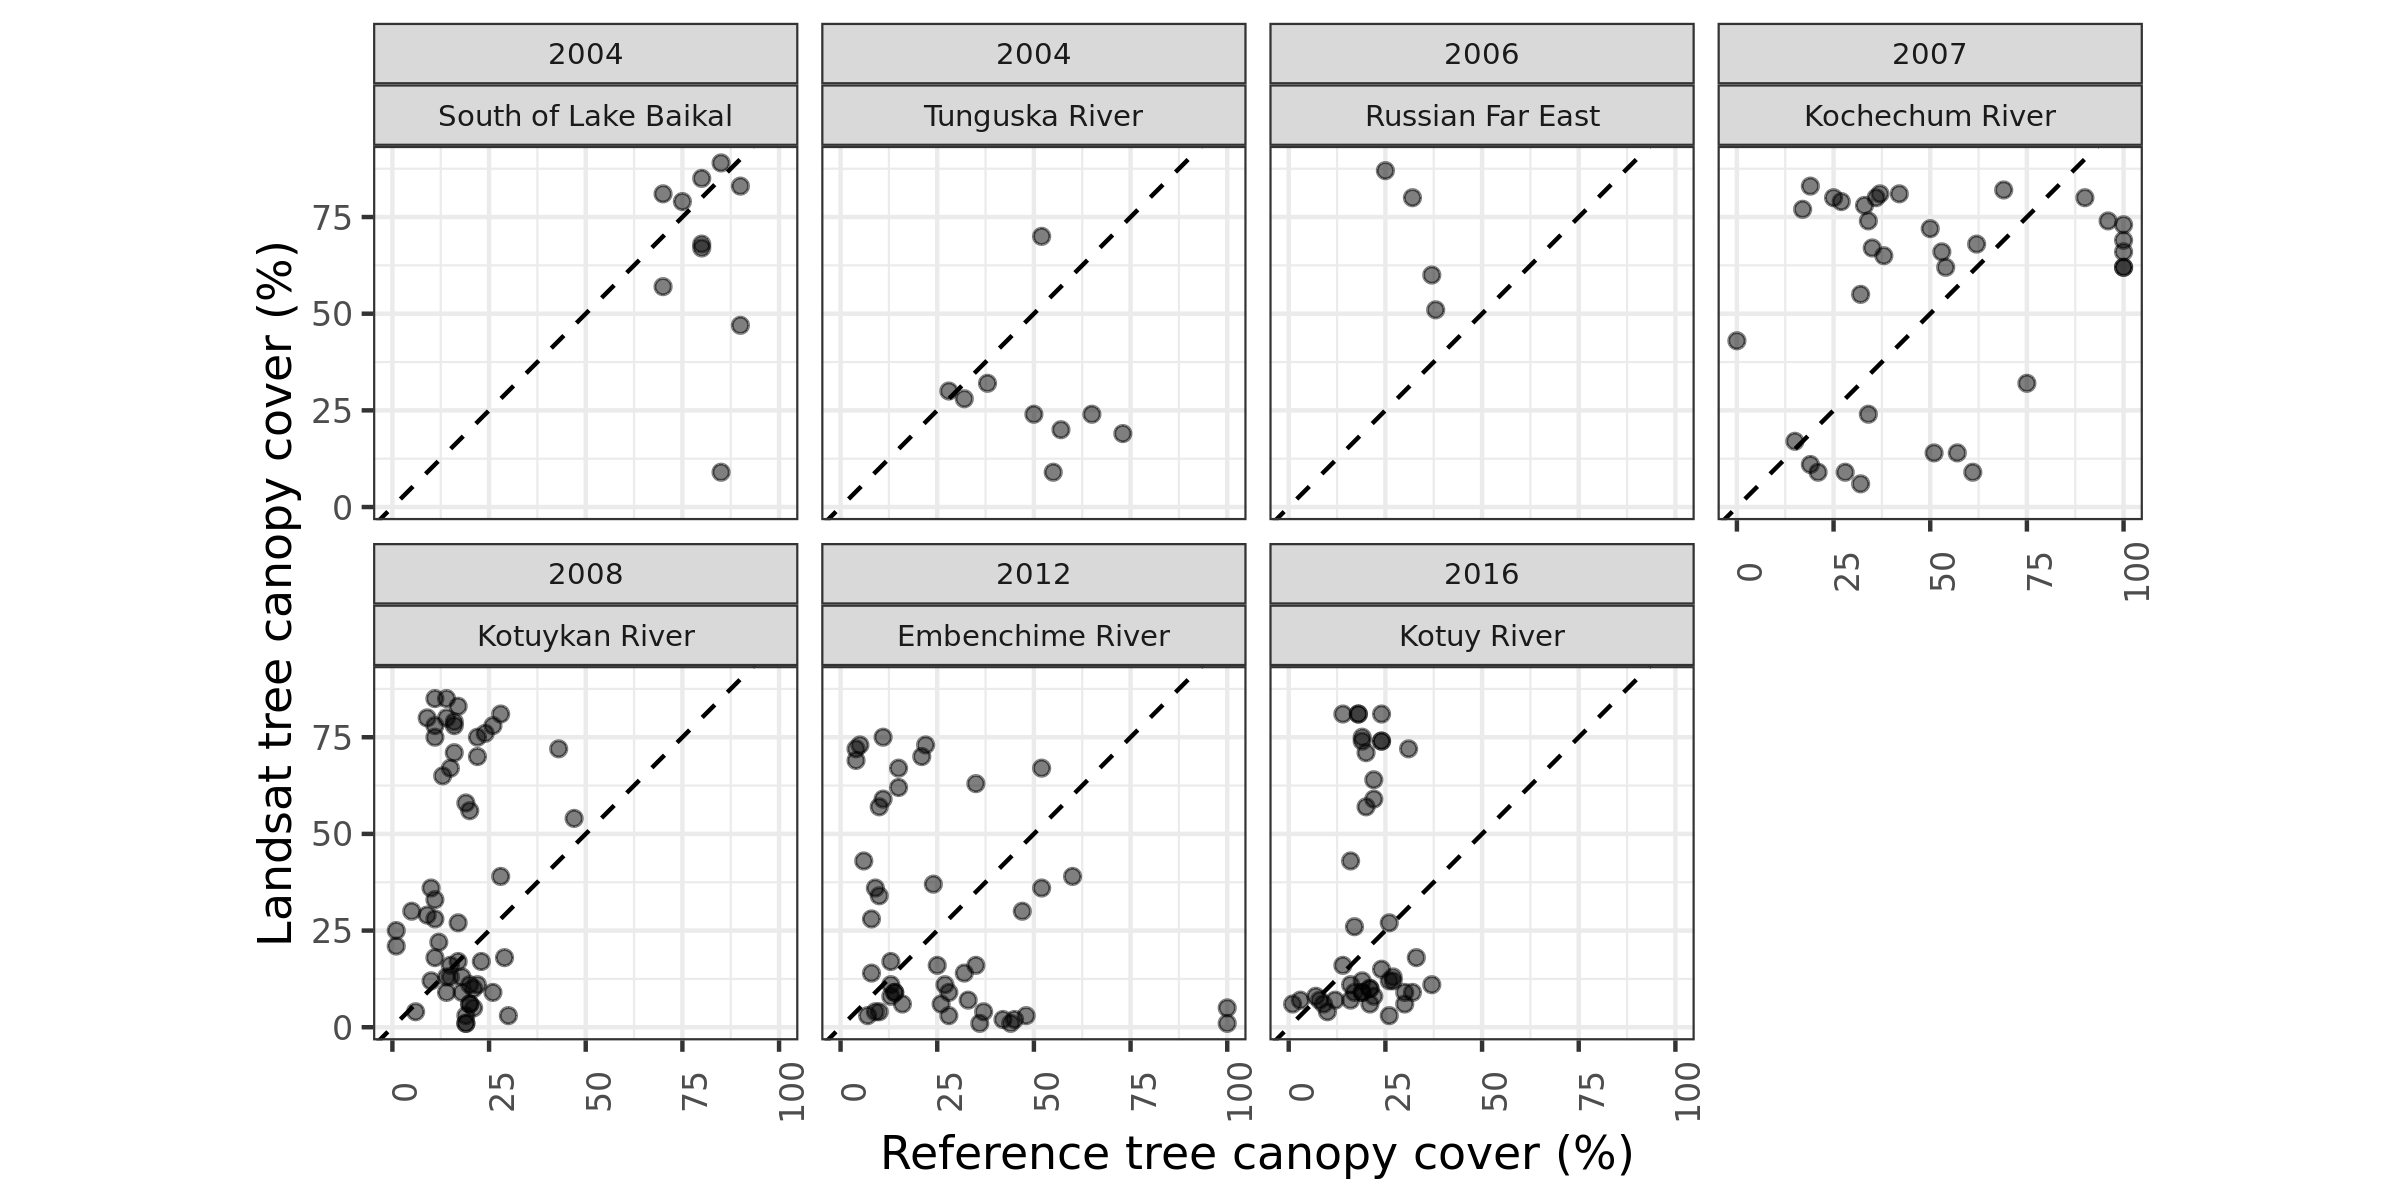

In [44]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 300)

eurasia_tcc %>% drop_na(names(eurasia_tcc)[grep("tp_tcc2", names(eurasia_tcc))]) %>% 
as.data.frame() %>% 
drop_na(canopy_cover) %>%
droplevels() %>%
ggplot(aes(x=as.numeric(canopy_cover), y=tp_tcc2008)) + 
geom_point( alpha=0.5) + 
geom_abline(linetype='dashed') +
coord_equal() +
theme_bw() +
theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
labs(x='Reference tree canopy cover (%)', y = 'Landsat tree canopy cover (%)') +
facet_wrap(year~group_name, ncol=4)

In [130]:
head(kolyma_tcc %>% as.data.frame)

,site,lat,lon,canopy_cover,canopy_ste,stand_density,density_ste,larch_biomass,biomass_ste,year,⋯,tp_tcc2012,tp_tcc2013,tp_tcc2014,tp_tcc2015,tp_tcc2016,tp_tcc2017,tp_tcc2018,tp_tcc2019,tp_tcc2020,geom
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<POINT [°]>
1,1,68.76231,161.23608,15.51,1,0.05,0.03,611.2,431.5,2010,⋯,14,9,18,15,13,12,19,15,14,POINT (161.2361 68.76231)
2,2,68.76919,161.24397,7.52,0.6,0,0,0,0,2010,⋯,7,11,17,15,12,14,18,15,22,POINT (161.244 68.76919)
3,3,68.78801,161.49601,7.86,1.6,0.02,0.02,0.3,0.3,2010,⋯,6,4,11,6,5,5,4,7,8,POINT (161.496 68.78801)
4,4,68.7822,161.47642,2.91,0.87,0.01,0.01,0,0,2010,⋯,3,2,6,3,3,5,2,3,5,POINT (161.4764 68.7822)
5,5,68.7457,161.53402,0.74,0.39,0,0,0,0,2010,⋯,13,20,23,17,22,20,19,14,23,POINT (161.534 68.7457)
6,6,68.76189,161.38744,30.03,10.42,0.84,0.19,425.9,142.6,2010,⋯,20,23,26,29,29,24,32,34,34,POINT (161.3874 68.76189)


In [129]:
kolyma_tcc.m %>% filter(value == 0)

index1,year,project,canopy_cover,variable,value
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
328,2019,FLARE,1.408,2001,0
395,2013,TS,0,2005,0
395,2013,TS,0,2008,0
396,2013,TS,0,2012,0
396,2013,TS,0,2013,0
395,2013,TS,0,2015,0
395,2013,TS,0,2016,0
396,2013,TS,0,2016,0
395,2013,TS,0,2018,0


In [92]:
kolyma_tcc.m = reshape2::melt(kolyma_tcc %>% as.data.frame %>% select(index1, canopy_cover, year, project, contains('tcc')), id.vars=c('index1', 'year','project','canopy_cover')) 
kolyma_tcc.m$variable <- gsub("tp_tcc", "", kolyma_tcc.m$variable)

Warning message:
“Removed 8821 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

Warning message:
“Removed 20 rows containing missing values (geom_point).”


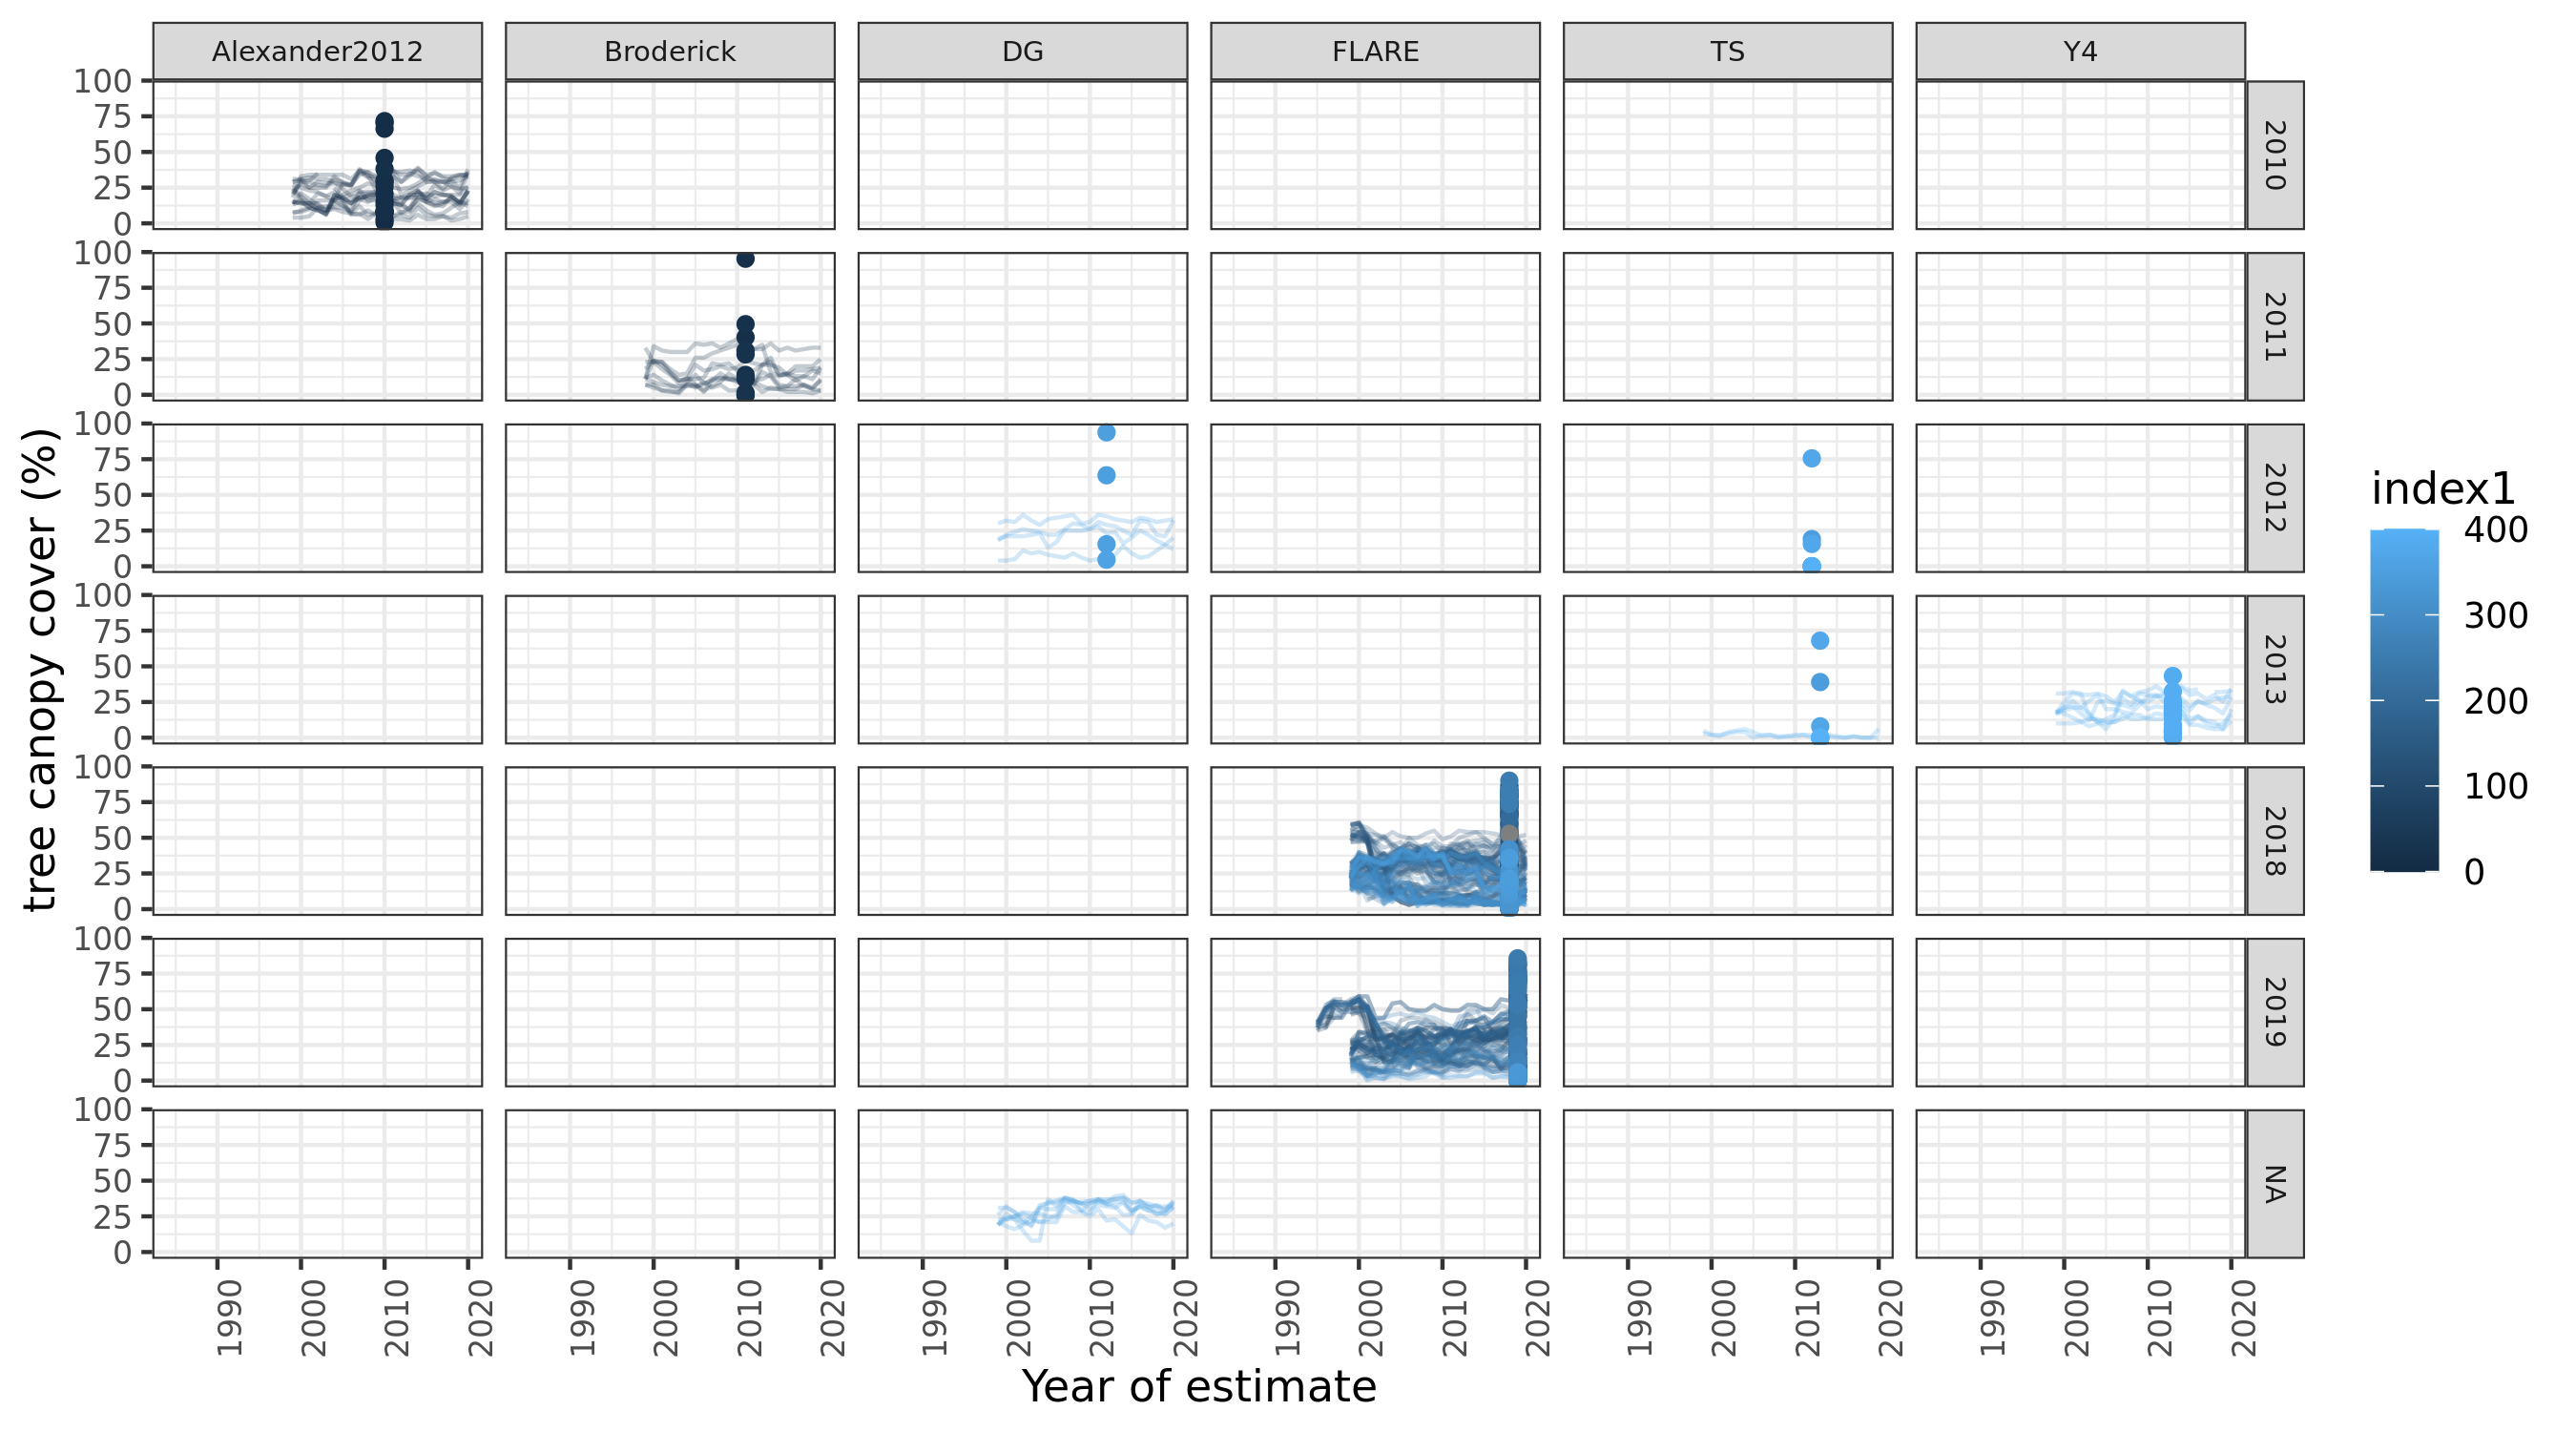

In [157]:
kolyma_tcc.m %>% 
#filter(site == 4) %>%
ggplot(aes(x=as.numeric(variable), y=value, group=index1, color=index1)) + 
#scale_y_continuous(limits=c(0,50))+
geom_path(alpha=0.25) + 
geom_point(data=kolyma_tcc, aes(x=as.numeric(year), y=as.numeric(canopy_cover, group=project, color=index1))) +
theme_bw() + 
theme(axis.text.x=element_text(angle=90, size=8), axis.text.y = element_text(size=8), strip.text = element_text(size=7)) + 
facet_grid(year~project)+
labs(x='Year of estimate', y = 'tree canopy cover (%)')

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'lon' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capt

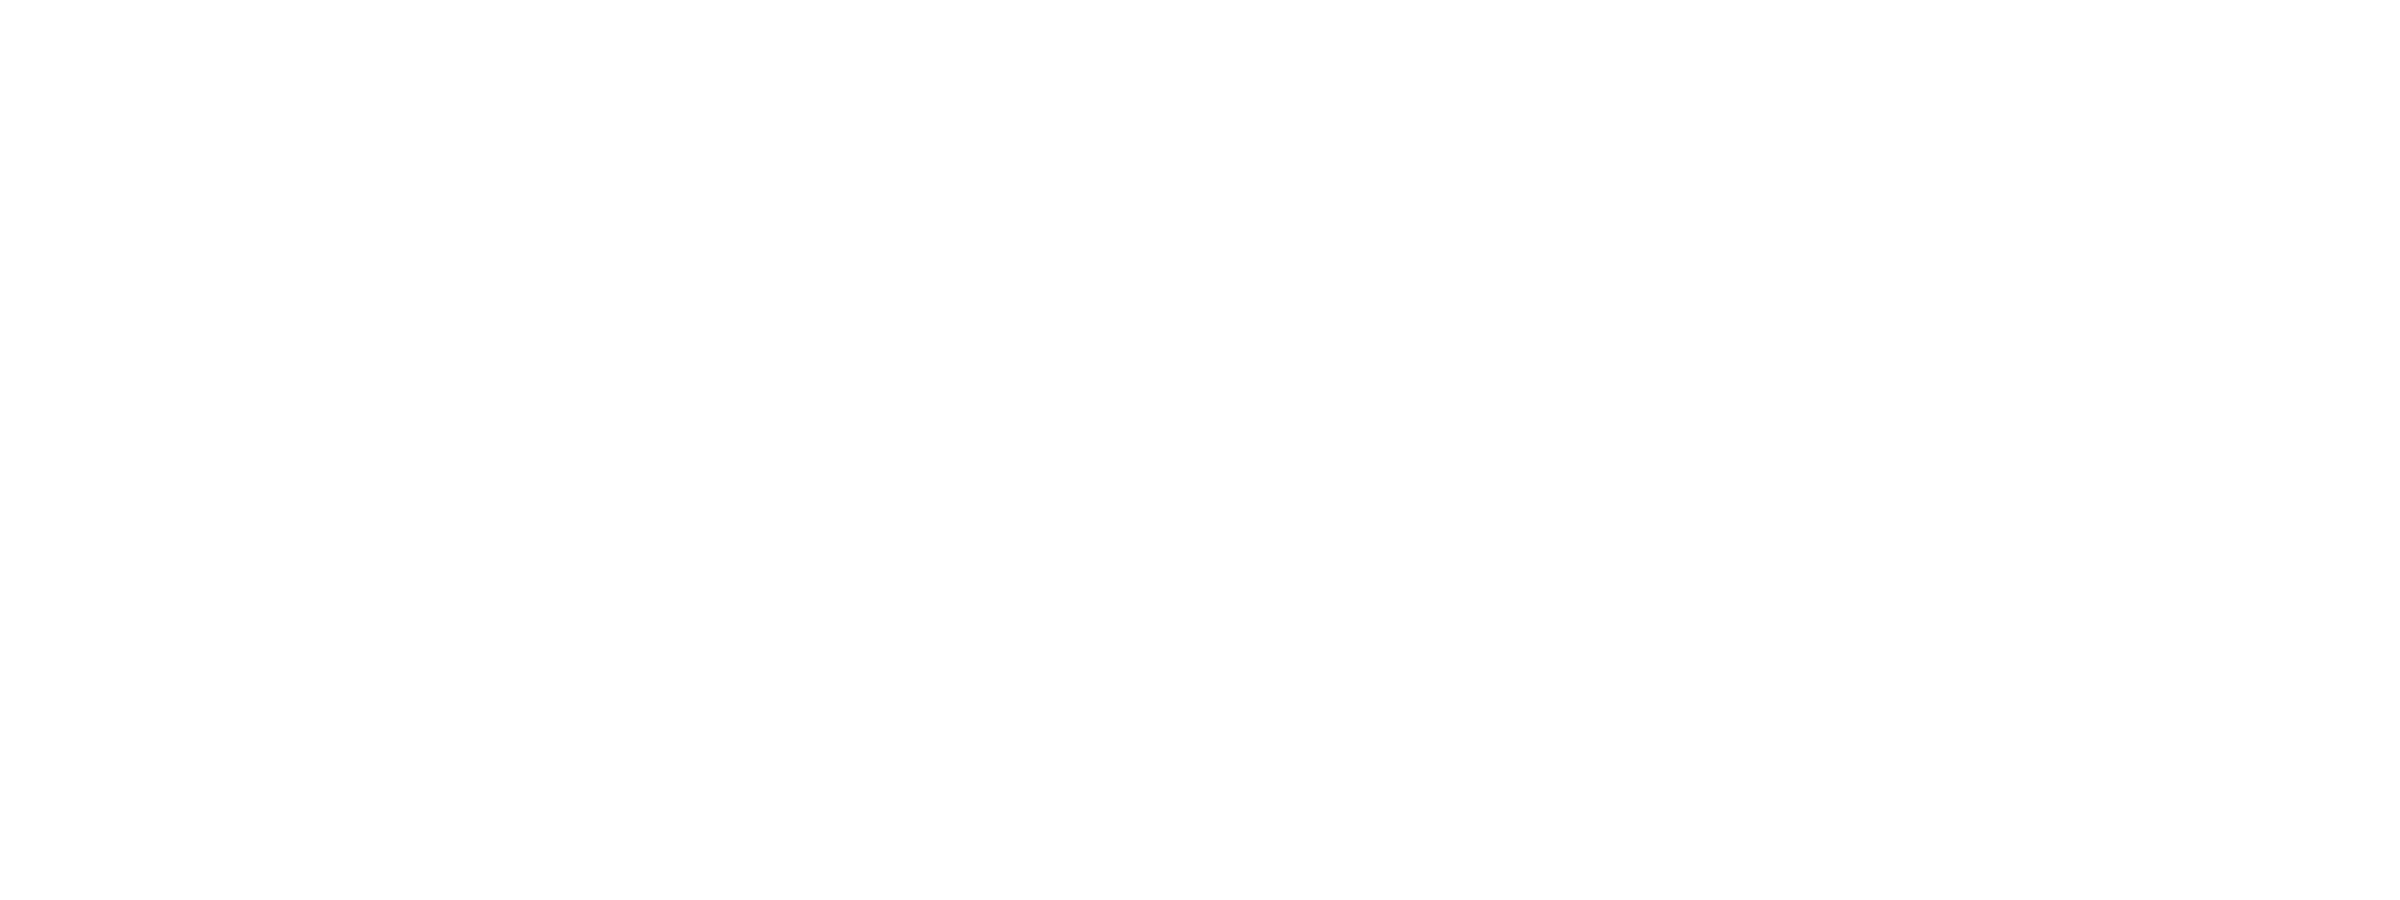

In [125]:
kolyma_tcc.m %>%
ggplot(aes(y=lat, x=lon, group=index1)) + geom_point(alpha=0.05)